## 1. Các phần kiến thức : 


1. SVD ( Singular Value Decompotion)
    * TL Tiếng Việt https://viblo.asia/p/handbook-singular-values-decomposition-va-mot-so-ung-dung-yMnKMOoml7P
    * TL Tiếng Anh https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf
2. PCA (Principal Component Analysis)
    * TL Tiếng Việt https://machinelearningcoban.com/2017/06/15/pca/
    * TL Tiếng Anh http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf
3. LSA (Bản chất SVD hoặc PCA áp dụng trong NLP)
4. LDA (Bản chất là LSA giảm về 1 chiều + cũng có thể là Classification model)
    * TL Tiếng Việt https://machinelearningcoban.com/2017/06/30/lda/
5. LDiA (Bản chất là LSA nhưng khác một chút về mô hình thống kê : LSA - tuyến tính; LDiA - phân phối Dirichlet)
    * TL Tiếng Việt https://phamdinhkhanh.github.io/2019/09/08/LDATopicModel.html
    * TL Tiếng Anh https://medium.com/@jonathan_hui/machine-learning-latent-dirichlet-allocation-lda-1d9d148f13a4
6. Khoảng cách và sự giống nhau
    * Một số cách tính KC và sự giống nhau khác nhau có trong tài liệu đã dịch [Link github NCKH2020/4]( https://github.com/nducthang/NCKH_2020/tree/master/Chapter04%20-%20Finding%20meaning%20in%20word%20counts%20(sematic%20analysis))
7. Naive Bayes
    * Công cụ có sẵn VADER để tìm sentiment cho một câu [Link github Vader](https://github.com/cjhutto/vaderSentiment)
    * Naive Bayes : mô hình phân loại Naive Bayes - Classification kết hợp với VADER và TF-IDF để tìm sentiment cho một từ trong văn bản.

## 2. Bài tập


**Bài 1 :** (Lý thuyết) Cho ma trận  M = \begin{bmatrix}
                            1 & 2 & 3\\
                            3 & 4 & 5\\
                            5 & 4 & 3\\
                            0 & 2 & 4\\
                            1 & 3 & 5
                            \end{bmatrix}


a. Phân tích SVD cho ma trận M .

b. Giảm số chiều cho ma trận M từ kết quả phần a. (Truncated SVD)

**Bài 2 :** (Thực hành)
Thực hiện giảm số chiều cho dữ liệu bài toán nhận biết chữ số viết tay, sau đó dùng 1 mô hình Classification để training (VD : Random Forest). Qua đó chọn số chiều phù hợp để đạt độ chính xác tốt (accuracy > 90%) 

In [10]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x : "%.2f" % x
np.set_printoptions(formatter = {'float_kind' : float_formatter})
#from sklearn.ensemble import RandomForestClassifier
X, y = load_digits(return_X_y = True)
print("Chiều của dữ liệu đầu vào X - ảnh: ", X.shape)
print("Chiều của dữ liệu đầu vào y - nhãn: ", y.shape)

Chiều của dữ liệu đầu vào X - ảnh:  (1797, 64)
Chiều của dữ liệu đầu vào y - nhãn:  (1797,)


Ví dụ ảnh của một image 1, với nhãn y =  0


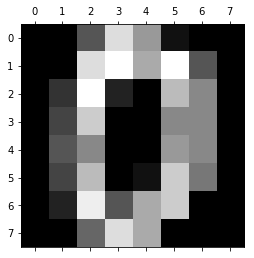

In [5]:
print("Ví dụ ảnh của một image 1, với nhãn y = ", y[0])
image = X[0].reshape ((8, 8))
plt.matshow(image, cmap = 'gray')

Lời giải : [Solution2](http://localhost:8888/notebooks/Desktop/NCKH_2020/Chapter04%20-%20Finding%20meaning%20in%20word%20counts%20(sematic%20analysis)/Solution2.ipynb)

**Bài 3 :** Bài toán phát hiện tin nhắn SPAM (dữ liệu tại nlpia.data - cần cài nlpia trước)
Cho dữ liệu gồm 4837 tin nhắn đã được dãn nhãn SPAM/NonSPAM. Chuyển dữ liệu về ma trận TF-IDF, sau đó dùng các mô hình sau để chuyển về các topic model và đoán nhận.

a. LDA để đoán nhận( cài đặt bằng tay)

b. PCA và SVD để giảm số chiều, sau đó chuyển thành topic model

c. LDiA để chuyển về topic model + áp dụng LDA ( dưới dạng mô hình classification) để đoán nhận

*(Bài này nên trong sách hoặc xem lời giải rồi thực hành)*

In [ ]:
import pandas as pd
from nlpia.data.loaders import get_data
pd.options.display.width = 120  # heaps display the wide columnof SMS text withn Pandas DF printout
sms= get_data("sms-spam")
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms= pd.DataFrame(sms.values, columns = sms.columns, index = index)
print("sms : ", len(sms), "; sms spam : ", sms.spam.sum())

# Do tokenization and tf-idf vector transformation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf_model = TfidfVectorizer(tokenizer = casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents = sms.text).toarray()
print("Dữ liệu TF-IDF : ", tfidf_docs.shape)
# (4837, 9232)

Lời giải : [Solution3](http://localhost:8888/edit/Desktop/NCKH_2020/Chapter04%20-%20Finding%20meaning%20in%20word%20counts%20(sematic%20analysis)/imp_and_solution3.py)